# Урок 10. Обучение без учителя в Scikit-learn.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

%config InlineBackend.figure_format = 'svg'

Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [2]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
boston.keys()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y = pd.DataFrame(boston.target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [14]:
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

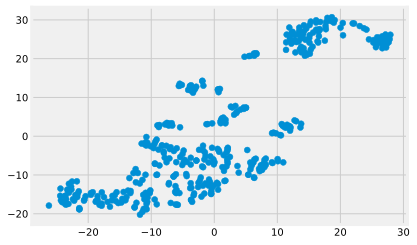

In [16]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]);

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [20]:
label_train = kmeans.fit_predict(X_train_scaled)

In [21]:
pd.value_counts(label_train)

2    191
1    127
0     86
dtype: int64

Text(20, 8, 'Claster 2')

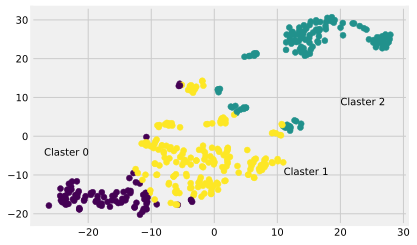

In [28]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=label_train);
plt.text(-27, -5, 'Claster 0')
plt.text(11, -10, 'Claster 1')
plt.text(20, 8, 'Claster 2')

In [49]:
for i in range(3):
    print('Среднее значение цены в кластере {} = {}'.format(i, y_train.loc[label_train==i, 'price'].mean()))
    print('Среднее значение параметра CRIM в кластере {} = {}'.format(i, X_train.loc[label_train==i, 'CRIM'].mean()))
    print()

Среднее значение цены в кластере 0 = 27.788372093023252
Среднее значение параметра CRIM в кластере 0 = 0.07356558139534886

Среднее значение цены в кластере 1 = 16.165354330708666
Среднее значение параметра CRIM в кластере 1 = 10.797028425196853

Среднее значение цены в кластере 2 = 24.958115183246072
Среднее значение параметра CRIM в кластере 2 = 0.42166020942408367



* Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [50]:
label_test = kmeans.predict(X_test_scaled)

In [51]:
for i in range(3):
    print('Среднее значение цены в кластере {} = {}'.format(i, y_test.loc[label_test==i, 'price'].mean()))
    print('Среднее значение параметра CRIM в кластере {} = {}'.format(i, X_test.loc[label_test==i, 'CRIM'].mean()))
    print()

Среднее значение цены в кластере 0 = 31.35
Среднее значение параметра CRIM в кластере 0 = 0.062060000000000004

Среднее значение цены в кластере 1 = 16.437142857142856
Среднее значение параметра CRIM в кластере 1 = 10.165531142857143

Среднее значение цены в кластере 2 = 21.860784313725492
Среднее значение параметра CRIM в кластере 2 = 0.26607882352941176

